In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

#### Functions used in the study.

In [3]:
# Dataset overview function
def check_df(dataframe, head=5):
    print("######################### SHAPE #########################")
    print(dataframe.shape)
    print("######################### DTYPES #########################")
    print(dataframe.dtypes)
    print("######################### NULL VALUES #########################")
    print(dataframe.isnull().sum())
    print("######################### INFO #########################")
    print(dataframe.info())
    print("######################### HEAD #########################")
    print(dataframe.head(head))
    print("######################### TAIL #########################")
    print(dataframe.tail(head))
    print("######################### DESCRIBE #########################")
    print(dataframe.describe().T)
    
# Check for unique values function
def check_uniques(dataframe):
    for col in dataframe.columns:
        print(' '*20)
        print(col.upper())
        print(dataframe[col].unique())
        
# Plot histogram function
def view_histogram(dataframe, columns = None):    
    num_columns = dataframe.select_dtypes(include=['int64','float64']).columns if columns is None else \
    columns
    
    for col in num_columns:    
        mean_value = dataframe[col]. mean()
        
        plt.figure(figsize=(5,5))
        plt.grid(True)
        plt.title(dataframe[col].name)
        sns.histplot(dataframe[col], kde=True)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.legend()
        plt.show()
        
        print('Min:', dataframe[col].min())
        print('Max:', dataframe[col].max())
        print('Mean:', mean_value)
        print('Std:', dataframe[col].std())
        print('Skewness:', dataframe[col].skew())
        print('Kurtosis', dataframe[col].kurt())

# Show countplot function        
def show_countplot(dataframe, feature):
    plt.figure(figsize=(15,4))
    total = float(len(dataframe))
    countplot = sns.countplot(x=feature, data=dataframe)
    for p in countplot.patches:
        height = p.get_height()
        countplot.text(p.get_x()+p.get_width()/2.,
                height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
        
# Create dataframe for ages groups function
def create_age_dataframe(dataframe, feature, bins, labels):
    
    ages_dict = {'Age': []}
    
    # Add keys to ages_dict
    for x in dataframe[feature].unique():
        if x not in ages_dict.keys():
            ages_dict[x] = []
    
    # Appendig values in ages_dict keys
    for i in range(len(labels)):
        down_limit_age, upper_limit_age = bins[i], bins[i+1]
        label = labels[i]
        ages_dict['Age'].append(label)
        
        # Filtering and counting needed data from the dataframe
        for column in dataframe[feature].unique():
            age_group_count = len(dataframe.loc[(dataframe['age']>down_limit_age) & (dataframe['age']<=upper_limit_age) & \
                                                       (dataframe[feature] ==column)])
            #Append data to ages_dict
            ages_dict[column].append(age_group_count)
    
    # Transform ages_dict to dataframe
    ages_dict = pd.DataFrame(ages_dict)
    ages_dict.columns = [col.replace('-', '_') for col in ages_dict.columns]
    
    return ages_dict  

# Adult Income Dataset

## Exploratory and Data Analysis

In [4]:
adult_income = pd.read_csv('data/adult.csv')

In [5]:
adult_income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
print('Adult Income dataset overview\n')
check_df(adult_income)

Adult Income dataset overview

######################### SHAPE #########################
(48842, 15)
######################### DTYPES #########################
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object
######################### NULL VALUES #########################
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
######################### INFO #############

In [7]:
# Rename the columns contains '-'
adult_income.columns = [col.replace('-', '_') for col in adult_income.columns]

In [8]:
print('Check for unique values')
check_uniques(adult_income)

Check for unique values
                    
AGE
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
                    
WORKCLASS
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
                    
FNLWGT
[226802  89814 336951 ... 129912 255835 257302]
                    
EDUCATION
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
                    
EDUCATIONAL_NUM
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
                    
MARITAL_STATUS
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
                    
OCCUPATION
['Machine-op-inspct' 'Far

### Cleaning dataset

In three features - workclass, occupation, and native_country - there are values '?'.

In [9]:
rows_with_questionmark = adult_income[adult_income.apply(lambda row: '?' in row.values, axis=1)]

In [10]:
round(len(rows_with_questionmark)/len(adult_income)*100, 4)

7.4117

There are 7.4117 percent with '?' symbols as values. The dataset is large enough, so we can remove these rows.

In [11]:
# Replace '?' with 'NaN'
clean_adult_income = adult_income.replace('?',pd.NA,)

In [12]:
clean_adult_income.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [13]:
# Remove 'NaN' values from dataset
clean_adult_income.dropna(inplace = True)

In [14]:
clean_adult_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [15]:
clean_adult_income.shape

(45222, 15)

###  Extracting interesting information from the dataset.

In [16]:
clean_adult_income.native_country.value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [17]:
'Percentage of United-States population overall', round(clean_adult_income.native_country.value_counts()[0]/clean_adult_income.shape[0]*100,2)

('Percentage of United-States population overall', 91.31)

More than 90 percent of the respondents in this dataset are Americans around the year 1996. This should be taken into account in the analyses below.

#### Age

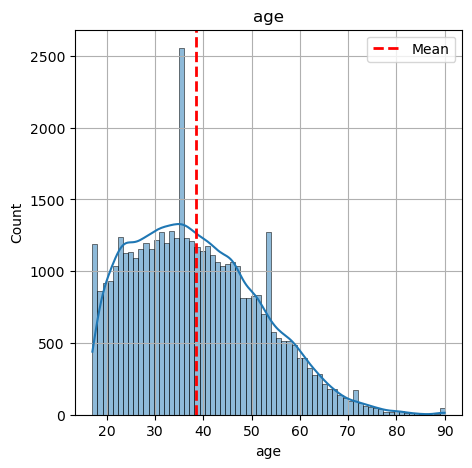

Min: 17
Max: 90
Mean: 38.547941267524656
Std: 13.217870219055524
Skewness: 0.5328158942555791
Kurtosis -0.15587445202596317


In [19]:
# View age histogram of the cleaned dataset
view_histogram(clean_adult_income, columns=['age'])

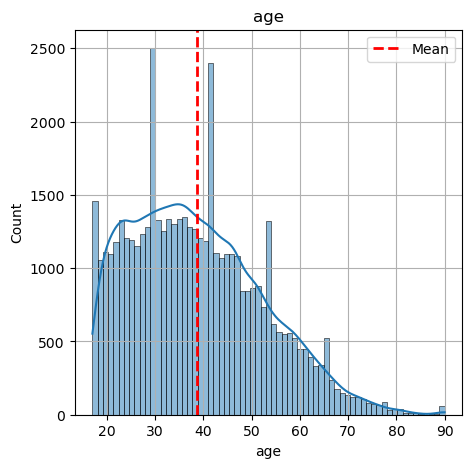

Min: 17
Max: 90
Mean: 38.64358543876172
Std: 13.71050993444322
Skewness: 0.5575803166133181
Kurtosis -0.18426874062387766


In [20]:
# View age histogram of the original dataset
view_histogram(adult_income, columns=['age'])

The comparison between the original and cleaned dataset shows insignificant statistical differences.

In [22]:
# Splitting the data by the mean value.
mean_age = clean_adult_income['age'].mean()
below_mean_age = clean_adult_income[clean_adult_income['age'] < mean_age]
above_mean_age = clean_adult_income[clean_adult_income['age'] > mean_age]

print('Number of people:')
print('Below mean age ->', len(below_mean_age))
print('Above mean age ->', len(above_mean_age))
print('Ratio ->', len(below_mean_age)/len(above_mean_age))

Number of people:
Below mean age -> 24238
Above mean age -> 20984
Ratio -> 1.1550705299275639


More (around 15.5%) of the working individuals are below the average age.

The distribution has a slight positive skewness, despite the fact that most of the workers are below the average age. This is due to the presence of a certain portion of workers who are in the age range of 60 to 90 years.

In [23]:
# These bins and labels will be used throughout the analysis below.
bins = [17, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90',]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


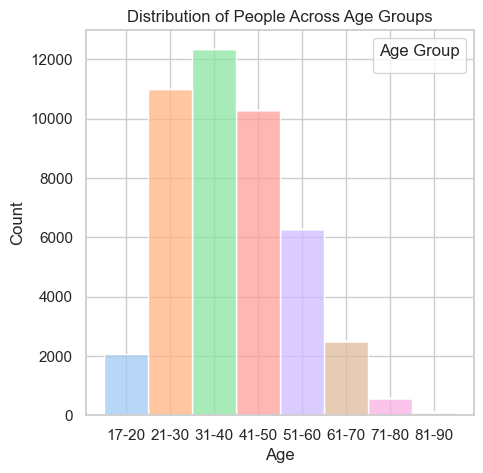

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.histplot(data=clean_adult_income, x=pd.cut(clean_adult_income['age'], bins=bins, labels=labels, right=False), hue=pd.cut(adult_income['age'], bins=bins, labels=labels, right=False), multiple="stack", palette="pastel")

plt.legend(title='Age Group')
plt.title('Distribution of People Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

The majority of the working population is between 20 and 60 years old.

#### Age - Income analysis

In [25]:
ages_counts_income = create_age_dataframe(clean_adult_income, 'income', bins, labels)
ages_counts_income

,Age,<=50K,>50K
0,17-20,2472,3
1,21-30,10331,961
2,31-40,8785,3506
3,41-50,6131,3859
4,51-60,3664,2169
5,61-70,1628,584
6,71-80,419,103
7,81-90,91,23


In [26]:
ages_counts_income.describe().T

,count,mean,std,min,25%,50%,75%,max
<=50K,8.0,4190.125,3843.504221,91.0,1325.75,3068.0,6794.50,10331.0
>50K,8.0,1401.000,1579.411916,3.0,83.00,772.5,2503.25,3859.0


In [27]:
ages_counts_income['<=50K'].sum(),ages_counts_income['>50K'].sum()

(33521, 11208)

In [28]:
round(ages_counts_income['<=50K'].sum()/len(clean_adult_income)*100, 2),  round(ages_counts_income['>50K'].sum()/len(clean_adult_income)*100, 2)

(74.13, 24.78)

Approximately three-quarters of people earn less or equal to 50,000.

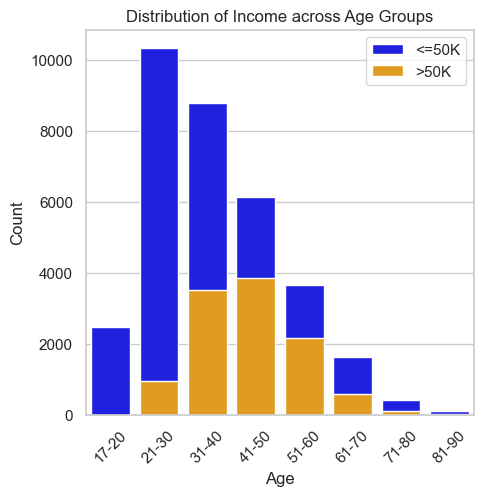

In [29]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Age', y='<=50K', data=ages_counts_income, color='blue', label='<=50K')

sns.barplot(x='Age', y='>50K', data=ages_counts_income, color='orange', label='>50K')

plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Income across Age Groups')
plt.legend()
plt.show()

In [30]:
print('Percentage distribution of incomes by age group.')

print('Age', ' ' * 6, 'Total people count', ' ' * 6, '<=50K', ' ' * 6, '>50K')
for i in range(len(ages_counts_income.Age)):
    
    below = ages_counts_income['<=50K'][i]
    above = ages_counts_income['>50K'][i]
    total_people = below + above
    age_group = ages_counts_income['Age'][i]
    print(age_group,' ' * 5, total_people,' ' * 18,  round(below/total_people*100, 2),'%',' ' * 5,  round(above/total_people*100, 2), '%')

Percentage distribution of incomes by age group.
Age        Total people count        <=50K        >50K
17-20       2475                    99.88 %       0.12 %
21-30       11292                    91.49 %       8.51 %
31-40       12291                    71.48 %       28.52 %
41-50       9990                    61.37 %       38.63 %
51-60       5833                    62.82 %       37.18 %
61-70       2212                    73.6 %       26.4 %
71-80       522                    80.27 %       19.73 %
81-90       114                    79.82 %       20.18 %


As seen from the barchart and the percentage breakdown of incomes by age group, in all age groups, the majority of people earn less than or equal to 50,000. It is evident that the percentage of high income is lowest in the 17 to 30 age range and highest between the ages of 31 and 60. This makes sense - as individuals age, it is normal for their incomes to increase due to accumulated experience, on one hand, and their significant workforce capability, in other hand. This percentage remains relatively high - around 20 percent - even in advanced age (60 years and above), despite the drastic decrease in the number of working individuals in this age group after the age of 60. Additionally, it can be observed that the highest employment rate for individuals is between 21 and 40 years old, gradually declining afterward.

#### Age - Gender analysis

In [34]:
grouped_data = clean_adult_income.groupby('gender').agg({'age': ['count', 'mean']}).reset_index()
print(grouped_data.sort_values(by=('age','mean'), ascending=False))

   gender    age           
           count       mean
1    Male  30527  39.300423
0  Female  14695  36.984757


In [59]:
# Cleaned dataset male/female ratio
females, males = grouped_data.age.value_counts().index[0][0],grouped_data.age.value_counts().index[1][0]
ratio = females/(males + females)
print('Females ratio:',ratio)
print('Males ratio:', 1 - ratio)

Females ratio: 0.32495245676882933
Males ratio: 0.6750475432311707


In [68]:
# Original dataset male/female ratio
females, males = adult_income.gender.value_counts()[1],adult_income.gender.value_counts()[0]
ratio = females/(males + females)
print('Females ratio:',ratio)
print('Males ratio:', 1 - ratio)

Females ratio: 0.33151795585766347
Males ratio: 0.6684820441423365


The male-to-female ratio does not show a significant change after reducing the dataset by 7 percent.

Just over two-thirds of the workforce are men, with their average age slightly higher compared to that of women. Possible explanations include: the dataset's composition being primarily composed of interviews with men (relying on the traditional male role of working and earning money); later retirement age for men (Without having data that this is the prevailing retirement age condition. But the higher average age of working men supports such an assumption. In addition, since the majority of the data in this dataset is collected in the United States, they should have the greatest influence. On average, women in the United States retire earlier than men.); greater involvement of women in caregiving responsibilities for children during certain periods of their lives, etc.

In [71]:
ages_counts_gender = create_age_dataframe(clean_adult_income, 'gender', bins, labels)
ages_counts_gender

,Age,Male,Female
0,17-20,1282,1193
1,21-30,7078,4214
2,31-40,8695,3596
3,41-50,7112,2878
4,51-60,4189,1644
5,61-70,1507,705
6,71-80,337,185
7,81-90,79,35


In [72]:
ages_counts_gender.describe().T

,count,mean,std,min,25%,50%,75%,max
Male,8.0,3784.875,3448.840941,79.0,1045.75,2848.0,7086.5,8695.0
Female,8.0,1806.250,1582.495475,35.0,575.00,1418.5,3057.5,4214.0


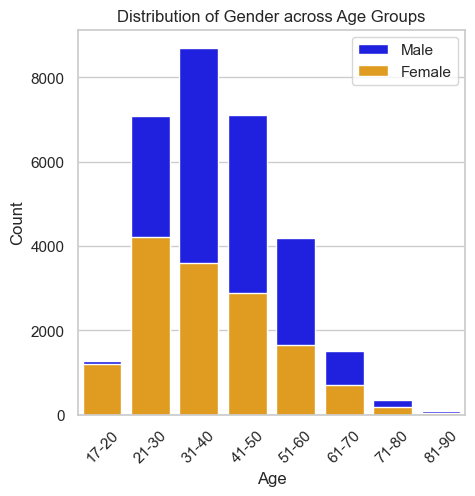

In [73]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Age', y='Male', data=ages_counts_gender, color='blue', label='Male')

sns.barplot(x='Age', y='Female', data=ages_counts_gender, color='orange', label='Female')

plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Gender across Age Groups')
plt.legend()
plt.show()

Here, a clear trend is evident - in the working-age range of 21-60, the majority of the workforce is comprised of men. The working age largely coincides with the fertile age range for women, 17-50. It is likely that all the factors mentioned above, and many others for sure, have an impact on this result.

#### Age - Education analysis

In [87]:
ages_counts_education = create_age_dataframe(clean_adult_income, 'education', bins, labels)
ages_counts_education

,Age,11th,HS_grad,Assoc_acdm,Some_college,10th,Prof_school,7th_8th,Bachelors,Masters,5th_6th,Assoc_voc,9th,Doctorate,12th,1st_4th,Preschool
0,17-20,310,862,15,989,76,0,21,2,2,15,16,37,0,122,4,4
1,21-30,337,3684,419,2938,244,78,107,2208,294,100,538,145,28,124,31,17
2,31-40,302,4203,526,2436,256,230,130,2312,683,87,654,155,133,116,51,17
3,41-50,205,2995,363,2031,162,272,163,1884,920,103,467,103,191,65,54,12
4,51-60,148,2067,139,1043,211,121,189,800,451,86,204,130,126,59,47,12
5,61-70,65,758,40,360,99,58,138,296,133,37,64,58,49,27,23,7
6,71-80,16,169,2,82,21,19,58,52,23,16,15,14,17,6,9,3
7,81-90,4,33,3,17,4,7,13,16,8,2,1,2,0,1,3,0


In [88]:
# Combine and reduce columns
ages_counts_education['No_HS_grad'] = ages_counts_education[['Preschool', '1st_4th', '5th_6th', '7th_8th', '9th', '10th', '11th', '12th']].sum(axis=1)
ages_counts_education['Associate_degree'] = ages_counts_education[['Assoc_acdm', 'Assoc_voc']].sum(axis=1)
ages_counts_education['HS_grad'] = ages_counts_education[['Prof_school', 'HS_grad']].sum(axis=1)

ages_counts_education.drop(columns=['Preschool', '1st_4th', '5th_6th', '7th_8th', '9th', '10th', '11th', '12th','Assoc_acdm', 'Assoc_voc','Prof_school'], inplace=True)

ages_counts_education

,Age,HS_grad,Some_college,Bachelors,Masters,Doctorate,No_HS_grad,Associate_degree
0,17-20,862,989,2,2,0,589,31
1,21-30,3762,2938,2208,294,28,1105,957
2,31-40,4433,2436,2312,683,133,1114,1180
3,41-50,3267,2031,1884,920,191,867,830
4,51-60,2188,1043,800,451,126,882,343
5,61-70,816,360,296,133,49,454,104
6,71-80,188,82,52,23,17,143,17
7,81-90,40,17,16,8,0,29,4


The following is a breakdown of educational degrees by age groups.

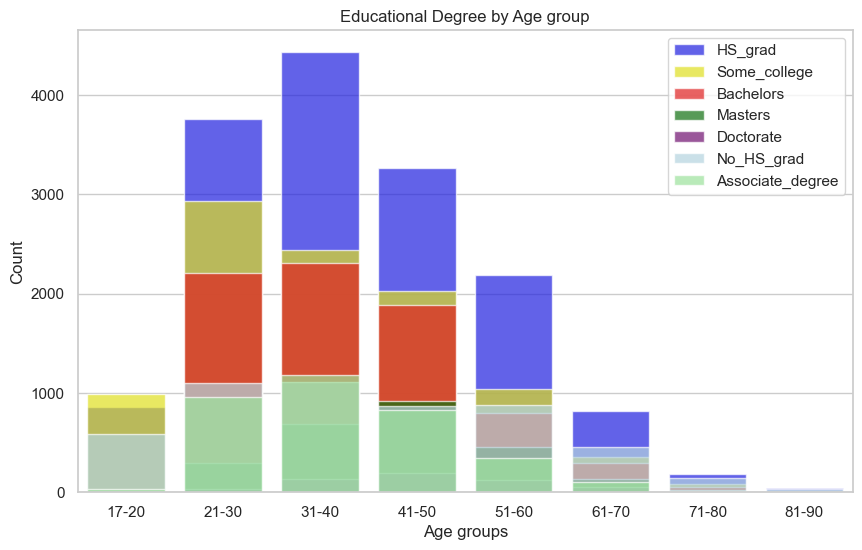

In [89]:
plt.figure(figsize=(10, 6))

colors = iter(['blue', 'yellow', 'red', 'green', 'purple', 'lightblue', 'lightgreen', 'grey'])

for degree in ages_counts_education.drop(columns=['Age']).columns.unique():
    sns.barplot(x = 'Age', y = ages_counts_education[degree], data=ages_counts_education, label = degree, color = next(colors), alpha = 0.7)
plt.legend()
plt.title('Educational Degree by Age group')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

In [93]:
print('Percentage distribution of educational degrees across age groups.')
total_people_education_group = ages_counts_education.iloc[:, 1:].sum(axis=1)
ages_counts_education_by_groups = ages_counts_education.iloc[:, 1:].div(total_people_education_group, axis=0) * 100
ages_counts_education_by_groups.insert(0, 'Age', ages_counts_education.Age)
ages_counts_education_by_groups

Percentage distribution of educational degrees across age groups.


,Age,HS_grad,Some_college,Bachelors,Masters,Doctorate,No_HS_grad,Associate_degree
0,17-20,34.828283,39.959596,0.080808,0.080808,0.000000,23.797980,1.252525
1,21-30,33.315622,26.018420,19.553666,2.603613,0.247963,9.785689,8.475027
2,31-40,36.067041,19.819380,18.810512,5.556912,1.082093,9.063542,9.600521
3,41-50,32.702703,20.330330,18.858859,9.209209,1.911912,8.678679,8.308308
4,51-60,37.510715,17.881022,13.715069,7.731870,2.160123,15.120864,5.880336
5,61-70,36.889693,16.274864,13.381555,6.012658,2.215190,20.524412,4.701627
6,71-80,36.015326,15.708812,9.961686,4.406130,3.256705,27.394636,3.256705
7,81-90,35.087719,14.912281,14.035088,7.017544,0.000000,25.438596,3.508772


In [92]:
ages_counts_education_by_groups.describe().T

,count,mean,std,min,25%,50%,75%,max
HS_grad,8.0,35.302138,1.667576,32.702703,34.450118,35.551522,36.272704,37.510715
Some_college,8.0,21.363088,8.302757,14.912281,16.133351,18.850201,21.752353,39.959596
Bachelors,8.0,13.549655,6.397399,0.080808,12.526588,13.875079,18.822599,19.553666
Masters,8.0,5.327343,2.928267,0.080808,3.955501,5.784785,7.196125,9.209209
Doctorate,8.0,1.359248,1.212241,0.000000,0.185972,1.497002,2.173890,3.256705
No_HS_grad,8.0,17.475550,7.781777,8.678679,9.605152,17.822638,24.208134,27.394636
Associate_degree,8.0,5.622978,2.958067,1.252525,3.445755,5.290982,8.349988,9.600521


Most people - slightly above 70% - have completed school, college, or hold a bachelor's degree. This indicates a good level of education among the working population, but it should be noted that, due to the largest share of interviewed citizens in the USA, this chart is largely influenced by the educational status of their population. People who have not completed high school education are twice as many as those who have completed a doctorate or master's degree. 

There is a clear trend indicating that the new generations are more inclined to pursue education. On the other hand, there is a distinct downward trend for those with incomplete secondary education towards the younger generation. Among the age groups over 51, the percentage is nearly double compared to those aged 21 to 51.

There is also a strong tendency for an increase in individuals who have completed a two-year college degree. The lower levels of education among older generations - above the age of 60 - may be partially explained by higher mortality rates in these age groups, but only to some extent. Mortality affects all individuals equally, and therefore, it cannot be expected to significantly influence the percentage distribution.

#### Age - Marital status analysis

In [97]:
clean_adult_income.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [98]:
ages_count_marital = create_age_dataframe(clean_adult_income, 'marital_status', bins, labels)
ages_count_marital

,Age,Never_married,Married_civ_spouse,Widowed,Separated,Divorced,Married_spouse_absent,Married_AF_spouse
0,17-20,2360,72,0,13,17,10,3
1,21-30,7168,3009,19,276,678,126,16
2,31-40,2931,6623,76,502,1997,152,10
3,41-50,1084,5985,207,398,2159,155,2
4,51-60,389,3697,390,181,1101,74,1
5,61-70,121,1342,394,37,295,23,0
6,71-80,33,273,160,3,43,10,0
7,81-90,22,52,31,1,7,1,0


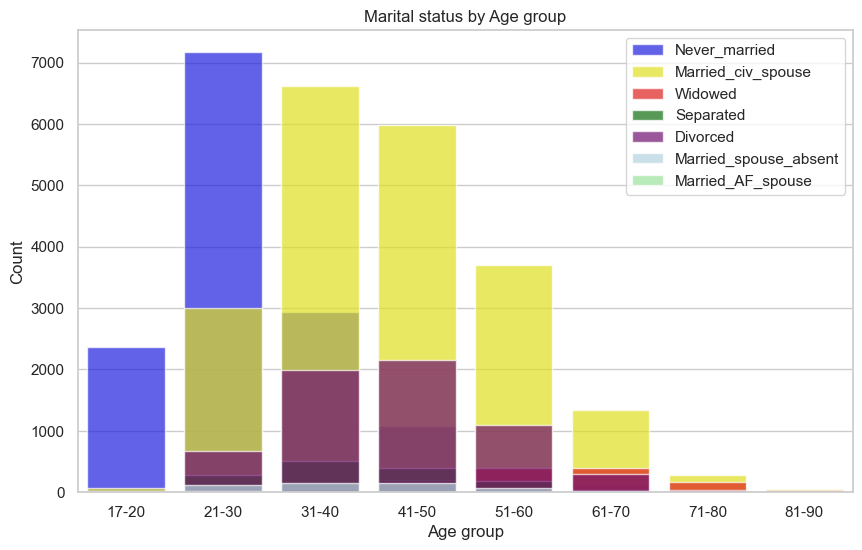

,Age,Never_married,Married_civ_spouse,Widowed,Separated,Divorced,Married_spouse_absent,Married_AF_spouse
0,17-20,95.353535,2.909091,0.000000,0.525253,0.686869,0.404040,0.121212
1,21-30,63.478569,26.647184,0.168261,2.444208,6.004251,1.115834,0.141693
2,31-40,23.846717,53.884956,0.618339,4.084289,16.247661,1.236677,0.081360
3,41-50,10.850851,59.909910,2.072072,3.983984,21.611612,1.551552,0.020020
4,51-60,6.668953,63.380765,6.686096,3.103034,18.875364,1.268644,0.017144
5,61-70,5.470163,60.669078,17.811935,1.672694,13.336347,1.039783,0.000000
6,71-80,6.321839,52.298851,30.651341,0.574713,8.237548,1.915709,0.000000
7,81-90,19.298246,45.614035,27.192982,0.877193,6.140351,0.877193,0.000000


In [99]:
plt.figure(figsize=(10, 6))

colors = iter(['blue', 'yellow', 'red', 'green', 'purple', 'lightblue', 'lightgreen'])

for m_status in ages_count_marital.drop(columns=['Age']).columns.unique():
    sns.barplot(x = 'Age', y = ages_count_marital[m_status], data=ages_count_marital, label = m_status, color = next(colors), alpha = 0.7)
plt.legend()
plt.title('Marital status by Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

total_people_age_group = ages_count_marital.iloc[:, 1:].sum(axis=1)
percentage_marital_by_group = ages_count_marital.iloc[:, 1:].div(total_people_age_group, axis=0) * 100
percentage_marital_by_group.insert(0, 'Age', ages_count_marital.Age)
percentage_marital_by_group

These data reveal interesting patterns. Understandably, the highest percentage of unmarried individuals is in the age range between 17 and 30 years. Since more than 90 percent of the respondents are residents of the USA, this statistic reflects the trend among young people there, which is likely valid for Western civilizations in general—prioritizing personal development, acquiring education, and pursuing career success over early marriage. As age progresses, this percentage shows a strong tendency to decrease—from 95% in the range up to 20 years old to 6.67% between 51 and 60 years old. Logically, the percentage of married individuals starts to significantly increase from the age of 21, peaking in the range of 31 to 40. This also affirms the trend that, after completing their education and somewhat concurrently with their professional development, people increasingly focus on starting a family.

In parallel with the increase in marriages, there is also an observed rise in divorces in the years after 21, with their peak occurring between 41 and 50 years old. There are at least two probable reasons—one being that in this age range, the couple's children have likely grown up and taken their own path, meaning one of the main reasons for entering and sustaining a marriage diminishes. The other reason is that at this age, individuals more frequently reflect on and reassess their lives, including their relationships with their marital partners.

The percentage of separated couples, i.e., those who are married but live separately, doesn't undergo significant changes and remains at low percentages around 3-4%. These individuals are likely unwilling to engage in the difficulties associated with divorce proceedings.

The percentage of widowed individuals sees a substantial increase only after the age of 51, reaching its highest values after 71 years. This coincides with the average life expectancy.

#### Age - Occupation analysis

In [103]:
age_count_occupation = create_age_dataframe(clean_adult_income, 'occupation', bins,labels)
age_count_occupation

,Age,Machine_op_inspct,Farming_fishing,Protective_serv,Other_service,Prof_specialty,Craft_repair,Adm_clerical,Exec_managerial,Tech_support,Sales,Priv_house_serv,Transport_moving,Handlers_cleaners,Armed_Forces
0,17-20,142,88,31,658,73,152,381,52,39,492,15,73,279,0
1,21-30,814,300,266,1360,1312,1379,1699,1002,437,1417,55,472,770,9
2,31-40,884,379,286,1072,1738,1996,1343,1776,433,1247,27,660,448,2
3,41-50,641,288,210,717,1700,1411,1082,1726,308,1053,36,540,276,2
4,51-60,357,205,109,493,791,819,662,985,153,678,35,406,139,1
5,61-70,113,136,47,232,294,213,260,343,44,297,33,139,61,0
6,71-80,12,55,21,81,67,26,62,73,4,72,19,17,13,0
7,81-90,4,12,2,11,17,6,12,24,1,16,2,4,3,0


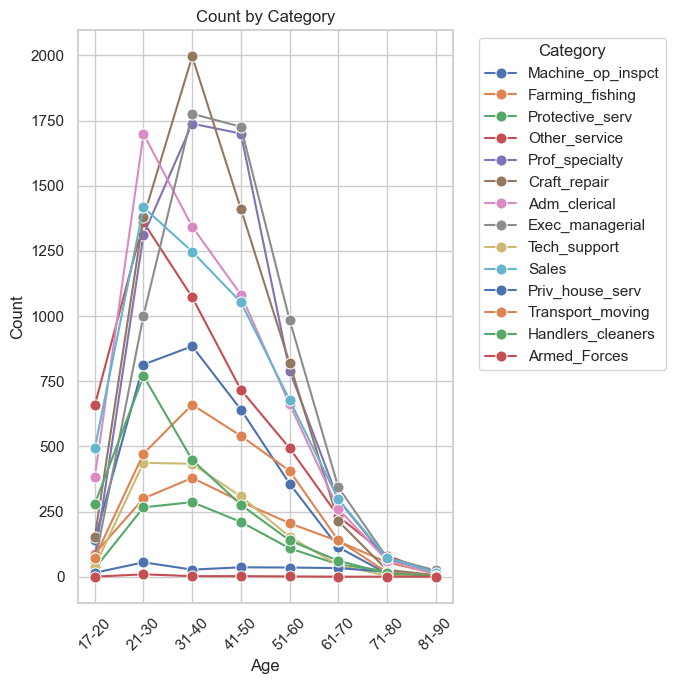

In [179]:
fig, ax = plt.subplots(figsize=(7, 7))

for i, category in enumerate(age_count_occupation.columns.unique().drop('Age')):
    sns.lineplot(x='Age', y=category, data=age_count_occupation, marker='o', markersize=8, label=category, palette=sns.color_palette("husl", len(age_count_occupation.columns.unique().drop('Age'))))
    sns.scatterplot(x='Age', y=category, data=age_count_occupation, palette=sns.color_palette("husl", len(age_count_occupation.columns.unique().drop('Age'))))

ax.set_ylabel('Count')
ax.set_title('Count by Category')
plt.xticks(rotation=45)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [194]:
count_workspace = age_count_occupation.describe().T
count_workspace

,count,mean,std,min,25%,50%,75%,max
Machine_op_inspct,8.0,370.875,361.561865,4.0,87.75,249.5,684.25,884.0
Farming_fishing,8.0,182.875,131.188455,12.0,79.75,170.5,291.00,379.0
Protective_serv,8.0,121.500,115.912529,2.0,28.50,78.0,224.00,286.0
Other_service,8.0,578.000,474.600584,11.0,194.25,575.5,805.75,1360.0
Prof_specialty,8.0,749.000,743.178886,17.0,71.50,542.5,1409.00,1738.0
Craft_repair,8.0,750.250,766.580860,6.0,120.50,516.0,1387.00,1996.0
Adm_clerical,8.0,687.625,624.881917,12.0,210.50,521.5,1147.25,1699.0
Exec_managerial,8.0,747.625,733.114089,24.0,67.75,664.0,1183.00,1776.0
Tech_support,8.0,177.375,188.418180,1.0,30.25,98.5,339.25,437.0
Sales,8.0,659.000,533.566973,16.0,240.75,585.0,1101.50,1417.0


In [196]:
max_values = count_workspace['max'].sort_values(ascending=False)
max_values

Craft_repair         1996.0
Exec_managerial      1776.0
Prof_specialty       1738.0
Adm_clerical         1699.0
Sales                1417.0
Other_service        1360.0
Machine_op_inspct     884.0
Handlers_cleaners     770.0
Transport_moving      660.0
Tech_support          437.0
Farming_fishing       379.0
Protective_serv       286.0
Priv_house_serv        55.0
Armed_Forces            9.0
Name: max, dtype: float64

Obviously, most people are employed in the age range from 21 to 60, even up to the age of 70. Among the most occupied sectors are those requiring higher levels of qualification, such as sales, administrative positions, machine and equipment repair and control, specialized fields like medicine, law, engineering, and others. It is noticeable that sectors related to production are missing. This may reflect a certain bias in the data collection process.

In [198]:
clean_adult_income.cre

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [200]:
clean_adult_income.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [202]:
age_count_relationship = create_age_dataframe(clean_adult_income, 'relationship', bins, labels)
age_count_relationship

,Age,Own_child,Husband,Not_in_family,Unmarried,Wife,Other_relative
0,17-20,1744,43,426,72,14,176
1,21-30,3175,2437,3774,923,437,546
2,31-40,868,5828,3091,1539,723,242
3,41-50,290,5400,2217,1386,543,154
4,51-60,87,3384,1318,630,287,127
5,61-70,13,1264,625,178,73,59
6,71-80,1,260,187,46,11,17
7,81-90,8,49,45,8,3,1


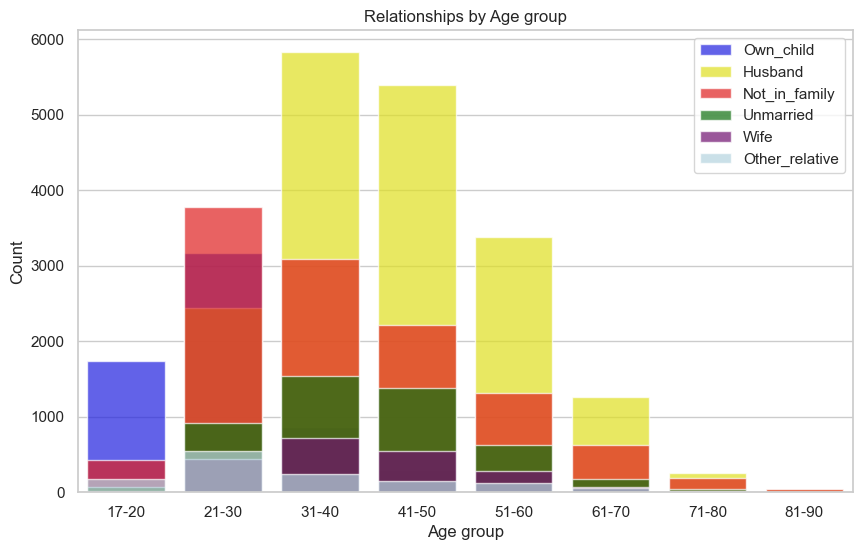

Percentage Ratios by Age Group


,Age,Own_child,Husband,Not_in_family,Unmarried,Wife,Other_relative
0,17-20,70.464646,1.737374,17.212121,2.909091,0.565657,7.111111
1,21-30,28.117251,21.581651,33.421892,8.173928,3.869996,4.835282
2,31-40,7.062078,47.416809,25.148483,12.521357,5.882353,1.968920
3,41-50,2.902903,54.054054,22.192192,13.873874,5.435435,1.541542
4,51-60,1.491514,58.014744,22.595577,10.800617,4.920281,2.177267
5,61-70,0.587703,57.142857,28.254973,8.047016,3.300181,2.667269
6,71-80,0.191571,49.808429,35.823755,8.812261,2.107280,3.256705
7,81-90,7.017544,42.982456,39.473684,7.017544,2.631579,0.877193


In [205]:
plt.figure(figsize=(10, 6))

colors = iter(['blue', 'yellow', 'red', 'green', 'purple', 'lightblue', 'lightgreen'])

for m_status in age_count_relationship.drop(columns=['Age']).columns.unique():
    sns.barplot(x = 'Age', y = age_count_relationship[m_status], data=ages_count_marital, label = m_status, color = next(colors), alpha = 0.7)
plt.legend()
plt.title('Relationships by Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

print('Percentage Ratios by Age Group')
total_people_age_group = age_count_relationship.iloc[:, 1:].sum(axis=1)
percentage_relationship_by_group = age_count_relationship.iloc[:, 1:].div(total_people_age_group, axis=0) * 100
percentage_relationship_by_group.insert(0, 'Age', ages_count_marital.Age)
percentage_relationship_by_group

In [207]:
age_count_relationship.describe().T

,count,mean,std,min,25%,50%,75%,max
Own_child,8.0,773.250,1145.435881,1.0,11.75,188.5,1087.00,3175.0
Husband,8.0,2333.125,2349.400436,43.0,207.25,1850.5,3888.00,5828.0
Not_in_family,8.0,1460.375,1414.067278,45.0,366.25,971.5,2435.50,3774.0
Unmarried,8.0,597.750,623.235051,8.0,65.50,404.0,1038.75,1539.0
Wife,8.0,261.375,280.315097,3.0,13.25,180.0,463.50,723.0
Other_relative,8.0,165.250,174.360669,1.0,48.50,140.5,192.50,546.0
